In [8]:
##this file can be run repeatedly
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
from scipy.stats import gaussian_kde
TFreeApps=pd.read_csv("TFreeApps.csv")
TPaidApps=pd.read_csv("TPaidApps.csv")
TGrossGame=pd.read_csv("TGrossGame.csv")
###read files completed

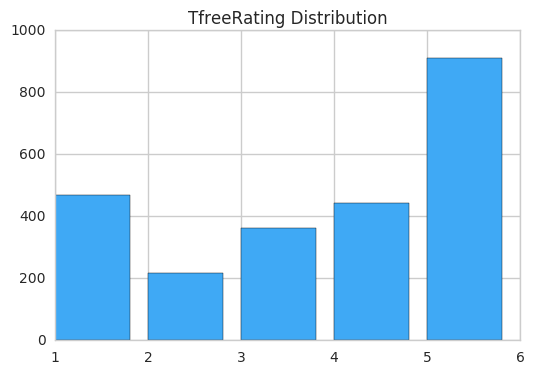

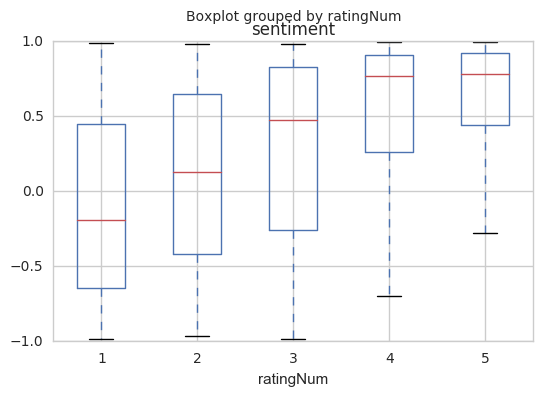

In [271]:
###very first rating graph on these 3 categories
##Top Free Apps
plt.bar(range(1,6),TFreeApps['ratingNum'].value_counts().sort_index(),color="#3fa9f5")
plt.title("TfreeRating Distribution")
df2=TFreeApps[['ratingNum','sentiment']].dropna()
df2.boxplot(by='ratingNum',column='sentiment')

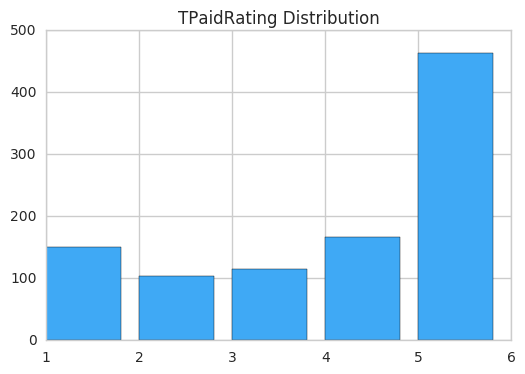

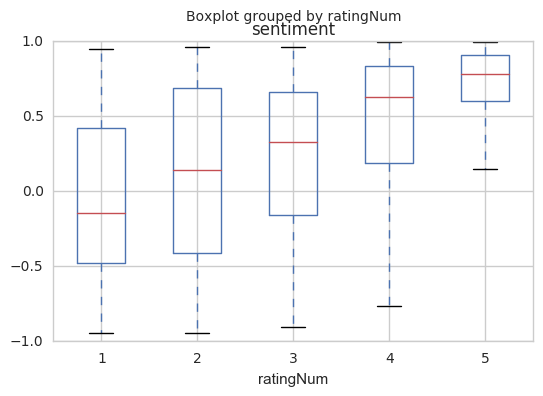

In [272]:
##Top Paid Apps
plt.bar(range(1,6),TPaidApps['ratingNum'].value_counts().sort_index(),color="#3fa9f5")
plt.title("TPaidRating Distribution")
df3=TPaidApps[['ratingNum','sentiment']].dropna()
df3.boxplot(by='ratingNum',column='sentiment')

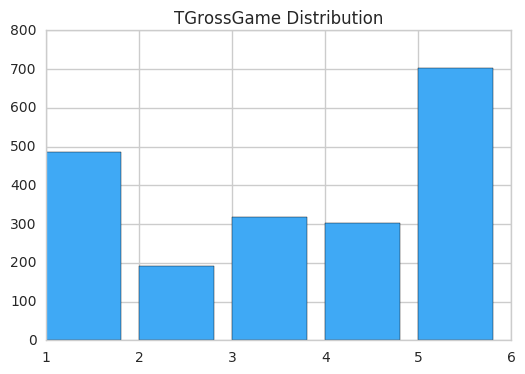

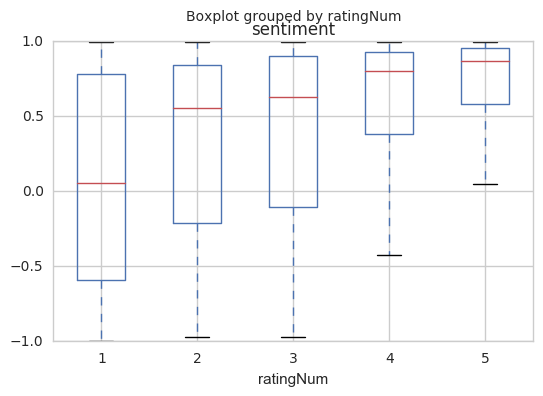

In [273]:
##Top Grossing Game
plt.bar(range(1,6),TGrossGame['ratingNum'].value_counts().sort_index(),color="#3fa9f5")
plt.title("TGrossGame Distribution")
df4=TGrossGame[['ratingNum','sentiment']].dropna()
df4.boxplot(by='ratingNum',column='sentiment')

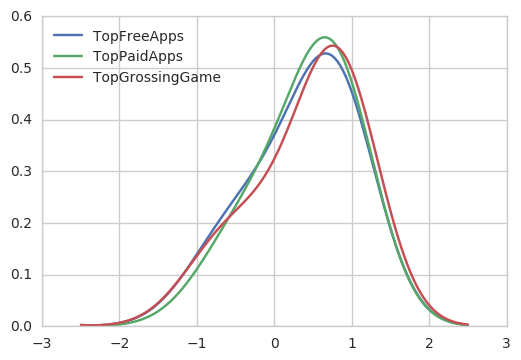

In [274]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(TFreeApps['sentiment'], bw=0.5,label="TopFreeApps")
sns.kdeplot(TPaidApps['sentiment'], bw=0.5,label="TopPaidApps")
sns.kdeplot(TGrossGame['sentiment'], bw=0.5,label="TopGrossingGame")

In [214]:
####word cloud
from wordcloud import WordCloud, STOPWORDS

In [275]:
def wcplot(dataset):
    bigstring=""
    for i in range(len(dataset)):#range(len(TFreeApps)):
        bigstring+=str(dataset.loc[i,'review'])
    wcloud=WordCloud(stopwords=STOPWORDS,background_color='white').generate(bigstring)
    plt.imshow(wcloud)
    plt.axis('off')
    plt.show()

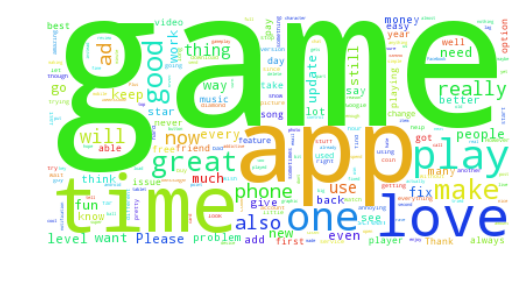

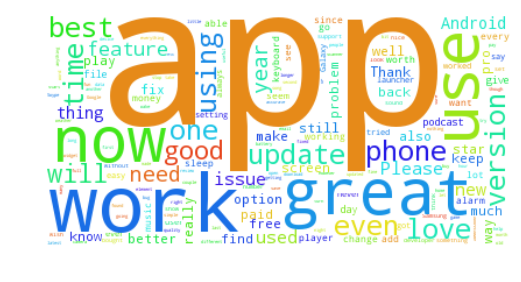

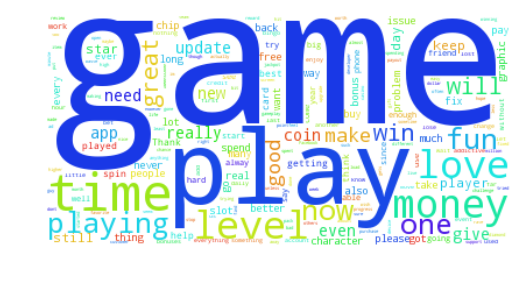

In [276]:
wcplot(TFreeApps)
wcplot(TPaidApps)
wcplot(TGrossGame)

In [9]:
########################################logistic regression on all review##############################################
from sklearn.datasets import load_iris
dat=pd.read_csv("data.csv")
dat['ratingNum']=0
for i in range(dat.shape[0]):
    dat.loc[i,'ratingNum']=int(dat.loc[i,'rating'][6])

In [10]:
####add length of review
dat['lenReview']=0
for i in range(dat.shape[0]):
    dat.loc[i,'lenReview']=len(str(dat.loc[i,'review']))

In [11]:
#####add date index
def replace_all(text, dic):
    for i, j in dic.iteritems():
        text = text.replace(i, j)
    return text
dict={'January': '1,','February':'2,','March':'3,','April':'4,','May':'5,','June':'6,','July':'7,',\
      'August':'8,','September':'9,','October':'10,','November':'11,','December':'12,'}
for i in range(dat.shape[0]):
    dat.loc[i,'date']=replace_all(dat.loc[i,'date'],dict)
    import time
timestamps=list(set(dat['date']))
for i in range(len(timestamps)):
    timestamps[i]=timestamps[i].replace(" ","")
sor=sorted(timestamps,key=lambda x: time.mktime(time.strptime(x,"%m,%d,%Y")))
dat['dateindex']=0
for i in range(dat.shape[0]):
    dat.loc[i,'date']=dat.loc[i,'date'].replace(" ","")
    dat.loc[i,'dateindex']=sor.index(dat.loc[i,'date'])

In [12]:
###add % of brand name in reviews
import re
def add_brand(df):
    df['Nbrand']=0
    for i in range(df.shape[0]):
        brand=[df.loc[i,'brand'].lower()]+df.loc[i,'brand'].lower().split()+\
        re.sub( r"([A-Z])", r" \1", df.loc[i,'brand']).lower().split()
        review=str(df.loc[i,'review']).replace("."," ").lower().split()
        df.loc[i,'Nbrand']=np.sum([review.count(j) for j in brand])
    return df
dat2=add_brand(dat)        

In [13]:
###add positive, negative, neutral sentiment on each review
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def add_sentiment(df):
    df['sentiment']=0
    df['neg']=0
    df['neu']=0
    df['pos']=0
    sid = SentimentIntensityAnalyzer()
    for i in range(df.shape[0]):
        ss = sid.polarity_scores(str(df.loc[i,'review']))
        df.loc[i,'sentiment']=ss['compound']
        df.loc[i,'neg']=ss['neg']
        df.loc[i,'pos']=ss['pos']
    return df

In [14]:
dat=add_sentiment(dat)

In [15]:
dat.to_csv("dataAProcess.csv")
dat

,category,rating,name,app,tp,review,date,brand,ratingNum,lenReview,dateindex,Nbrand,sentiment,neg,neu,pos
0,Action,Rated 5 stars out of five stars,Kalito Doughnuts,Color Switch,Top Free in Android Apps,This is the type of game you can just pickup a...,"2,9,2017",Fortafy Games,5,346,666,0,0.7345,0.022,0,0.109
1,Communication,Rated 5 stars out of five stars,Jonathan Macabuhay,Messenger,Top Free in Android Apps,Very nice to meet you at work and I have to go...,"2,11,2017",Facebook,5,59,668,0,0.4754,0.000,0,0.192
2,Finance,Rated 5 stars out of five stars,Lisa Resendez,IRS2Go,Top Free in Android Apps,To the ones saying this app keeps giving a mes...,"1,24,2017",IRS,5,347,650,3,0.6697,0.078,0,0.154
3,Communication,Rated 5 stars out of five stars,3rd Degree Inc,Marco Polo Video Walkie Talkie,Top Free in Android Apps,But it constantly crashes! I have reinstalled...,"2,7,2017",Joya Communications,5,302,664,0,0.8685,0.084,0,0.230
4,SportsAction & Adventure,Rated 2 stars out of five stars,Morgan Wilson,Madden NFL Mobile,Top Free in Android Apps,I don't like being overwhelmed by all these he...,"1,20,2017",ELECTRONIC ARTS,2,422,646,5,-0.4475,0.139,0,0.082
5,Action,Rated 5 stars out of five stars,Arrun Gaydhani,Color Switch,Top Free in Android Apps,Perfect example of what a mobile game should b...,"2,10,2017",Fortafy Games,5,388,667,0,0.8588,0.000,0,0.135
6,Action,Rated 4 stars out of five stars,Fatima Damir,Color Switch,Top Free in Android Apps,It's good but the ads are annoying. I like how...,"2,10,2017",Fortafy Games,4,197,667,0,-0.5859,0.236,0,0.201
7,Action,Rated 5 stars out of five stars,Versha Verma,Color Switch,Top Free in Android Apps,Its a commentable game. It is not too gud as t...,"2,10,2017",Fortafy Games,5,398,667,0,0.8360,0.000,0,0.127
8,Action,Rated 4 stars out of five stars,Trisha Gupta,Color Switch,Top Free in Android Apps,It is a excellent game. But why is Google givi...,"2,11,2017",Fortafy Games,4,143,668,0,-0.3182,0.243,0,0.177
9,Action,Rated 5 stars out of five stars,anonymous,Color Switch,Top Free in Android Apps,This game is so much fun to play in. You get t...,"2,9,2017",Fortafy Games,5,287,666,0,0.9414,0.000,0,0.241


In [259]:
###temporary to save new data
TFreeApps=dat.loc[dat.tp=="Top Free in Android Apps",]
TFreeApps.to_csv("TFreeApps.csv")
TPaidApps=dat.loc[dat.tp=="Top Paid in Android Apps",]
TPaidApps.to_csv("TPaidApps.csv")
TGrossGame=dat.loc[dat.tp=="Top Grossing Games",]
TGrossGame.to_csv("TGrossGame.csv")

In [262]:
####data modified and normalization####
n=7*dat.shape[0]//10
X=dat.iloc[:n,9:-1]
y=dat.iloc[:n,8]
y=[ 1 if j >3 else 0 for j in y]
def normalize(df):
    for i in range(df.shape[1]):
        df.iloc[:,i]=(df.iloc[:,i]-np.mean(df.iloc[:,i]))/np.std(df.iloc[:,i])
    return df
X1=normalize(X)
X1.neu=X1.neu.fillna(0)

In [263]:
#########logistic regression!!!######
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=100000,tol=0.000000001)
logistic.fit(X1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=None, solver='liblinear',
          tol=1e-09, verbose=0, warm_start=False)

In [264]:
logistic.intercept_ 

array([ 0.2899627])

In [265]:
########calculate accuracy##########
def acc(log,X1,y):
    X1m=np.matrix(X1)
    co=np.matrix(log.coef_)
    y2=np.dot(X1m,np.transpose(co))+log.intercept_[0]
    y2=[1 if j >0.5 else 0 for j in y2]
    return sum(map(lambda x1,x2:x1==x2,y,y2))*1.0/len(y)
acc(logistic,X1,y)

0.6988373944895684

In [269]:
#####accuracy on test set#####
def pdtNormal(df1,df_target):
    for i in range(df1.shape[1]):
        df_target.iloc[:,i]=(df_target.iloc[:,i]-np.mean(df1.iloc[:,i]))/np.std(df1.iloc[:,i])
    return df_target
X2=dat.iloc[n:,9:-1]
X2=pdtNormal(X,X2)
y2=dat.iloc[n:,8]
y2=[ 1 if j >3 else 0 for j in y2]
X2.neu=X2.neu.fillna(0)
acc(logistic,X2,y2)

0.4175334323922734